In [32]:
import logging
import geopandas as gpd
import matplotlib.pyplot as plt
from sliderule import icesat2
import icepyx as ipx
from pprint import pprint
import datetime

import numpy as np
import datetime

In [22]:
lake = gpd.read_file('/home/jovyan/ICESat-2-Hackweek/GEE/Attabad-Lake.shp')

# projection to wgs84
lake_wgs84 = lake.to_crs(4326)

# get 

bounds = lake_wgs84.bounds

minx = float(bounds.minx) - 0.02
maxx = float(bounds.maxx) + 0.02
miny = float(bounds.miny) - 0.02
maxy = float(bounds.maxy) + 0.02

In [26]:
print(minx)
print(maxx)
print(miny)
print(maxy)

region = [ {"lon":maxx, "lat": maxy},
           {"lon":minx, "lat": maxy},
           {"lon":minx, "lat": miny},
           {"lon":maxx, "lat": miny},
           {"lon":maxx, "lat": maxy} ]

74.8020967078372
74.89618583060114
36.27957059676453
36.371622618097945


In [27]:
# Build ATL06 Request
parms = {
    "poly": region,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 10.0,
    "cnt": 10,
    "len": 40.0,
    "res": 20.0,
    "maxi": 1
}

# Request ATL06 Data
gdf = icesat2.atl06p(parms)

# Display Statistics
print("Reference Ground Tracks: {}".format(gdf["rgt"].unique()))
print("Cycles: {}".format(gdf["cycle"].unique()))
print("Received {} elevations".format(len(gdf)))

Reference Ground Tracks: [1133 1217  775]
Cycles: [ 1  2  4  5  7  8  9 10 11 12 13 16]
Received 15304 elevations


(None,)

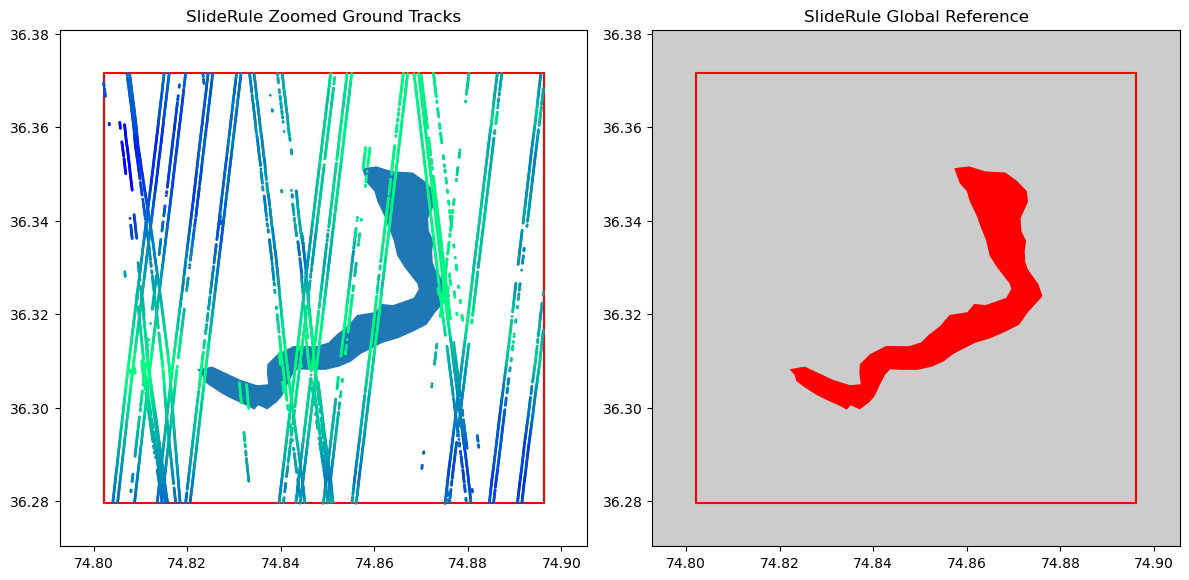

In [28]:
# Calculate Extent
lons = [p["lon"] for p in region]
lats = [p["lat"] for p in region]
lon_margin = (max(lons) - min(lons)) * 0.1
lat_margin = (max(lats) - min(lats)) * 0.1

# Create Plot
fig,(ax1,ax2) = plt.subplots(num=None, ncols=2, figsize=(12, 6))
box_lon = [e["lon"] for e in region]
box_lat = [e["lat"] for e in region]

# Plot SlideRule Ground Tracks
ax1.set_title("SlideRule Zoomed Ground Tracks")
gdf.plot(ax=ax1, column=gdf["h_mean"], cmap='winter_r', s=1.0, zorder=3000)
ax1.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2)
lake_wgs84.plot(ax=ax1, zorder=1000)
#glaciers_wgs84.plot(ax=ax1, facecolor='none') # linecolor='red'
ax1.set_xlim(min(lons) - lon_margin, max(lons) + lon_margin)
ax1.set_ylim(min(lats) - lat_margin, max(lats) + lat_margin)
ax1.set_aspect('equal', adjustable='box')

# Plot SlideRule Global View
ax2.set_title("SlideRule Global Reference")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax2, color='0.8', edgecolor='black')
#outline_wgs84.plot(ax=ax2)
ax2.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2)
lake_wgs84.plot(ax=ax2, lw=100, color='red')
#gdf.plot(ax=ax2, marker='o', color='red', markersize=2.5, zorder=3)
#gdf.plot()
ax2.set_xlim(-180,180)
ax2.set_ylim(-90,90)
ax2.set_xlim(min(lons) - lon_margin, max(lons) + lon_margin)
ax2.set_ylim(min(lats) - lat_margin, max(lats) + lat_margin)
ax2.set_aspect('equal', adjustable='box')

# Show Plot
plt.tight_layout(), 

In [31]:
gdf.head(30)

,cycle,h_sigma,n_fit_photons,h_mean,gt,dh_fit_dy,w_surface_window_final,dh_fit_dx,segment_id,rgt,pflags,rms_misfit,spot,distance,geometry
time,,,,,,,,,,,,,,,
2018-12-11 19:53:29.877312512,1,2.290026,22,3505.126540,10,0.0,31.155532,-1.221550,800014,1133,4,7.965445,6,1.602472e+07,POINT (74.89617 36.36828)
2018-12-11 19:53:29.880121344,1,0.734644,25,3481.673969,10,0.0,12.839961,-0.104387,800015,1133,0,2.400474,6,1.602474e+07,POINT (74.89615 36.36810)
2018-12-11 19:53:29.882349056,1,0.633009,131,4162.015412,50,0.0,25.032413,0.981370,800027,1133,4,7.244186,2,1.602498e+07,POINT (74.82542 36.37143)
2018-12-11 19:53:29.882934272,1,0.479111,38,3478.532014,10,0.0,14.232426,-0.232112,800016,1133,4,2.892289,6,1.602476e+07,POINT (74.89613 36.36792)
2018-12-11 19:53:29.885172736,1,0.698238,118,4181.627817,50,0.0,24.425662,0.957569,800028,1133,4,7.465227,2,1.602500e+07,POINT (74.82540 36.37125)
2018-12-11 19:53:29.885747456,1,0.406602,37,3472.639824,10,0.0,15.207814,-0.351467,800017,1133,4,2.473150,6,1.602478e+07,POINT (74.89611 36.36774)
2018-12-11 19:53:29.888003072,1,0.305403,100,4198.890566,50,0.0,19.888420,0.779569,800029,1133,4,3.052986,2,1.602502e+07,POINT (74.82538 36.37107)
2018-12-11 19:53:29.888559616,1,0.613048,22,3466.655784,10,0.0,12.367903,-0.220832,800018,1133,0,1.681545,6,1.602480e+07,POINT (74.89609 36.36756)
2018-12-11 19:53:29.890831616,1,0.331473,102,4214.439953,50,0.0,20.329340,0.796868,800030,1133,4,3.336878,2,1.602504e+07,POINT (74.82536 36.37089)


In [61]:
gdf['date'] = [datetime.datetime.strftime(a, '%Y-%m-%d') for a in gdf.index]

In [62]:
gdf

,cycle,h_sigma,n_fit_photons,h_mean,gt,dh_fit_dy,w_surface_window_final,dh_fit_dx,segment_id,rgt,pflags,rms_misfit,spot,distance,geometry,date
time,,,,,,,,,,,,,,,,
2018-12-11 19:53:29.877312512,1,2.290026,22,3505.126540,10,0.0,31.155532,-1.221550,800014,1133,4,7.965445,6,1.602472e+07,POINT (74.89617 36.36828),2018-12-11
2018-12-11 19:53:29.880121344,1,0.734644,25,3481.673969,10,0.0,12.839961,-0.104387,800015,1133,0,2.400474,6,1.602474e+07,POINT (74.89615 36.36810),2018-12-11
2018-12-11 19:53:29.882349056,1,0.633009,131,4162.015412,50,0.0,25.032413,0.981370,800027,1133,4,7.244186,2,1.602498e+07,POINT (74.82542 36.37143),2018-12-11
2018-12-11 19:53:29.882934272,1,0.479111,38,3478.532014,10,0.0,14.232426,-0.232112,800016,1133,4,2.892289,6,1.602476e+07,POINT (74.89613 36.36792),2018-12-11
2018-12-11 19:53:29.885172736,1,0.698238,118,4181.627817,50,0.0,24.425662,0.957569,800028,1133,4,7.465227,2,1.602500e+07,POINT (74.82540 36.37125),2018-12-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09 14:23:25.514832128,16,0.534735,108,3791.708401,20,0.0,26.997058,-0.899979,201813,1217,4,5.554886,5,4.047191e+06,POINT (74.83436 36.37073),2022-09-09
2022-09-09 14:23:25.517641728,16,0.441852,145,3768.761100,20,0.0,34.095650,-1.336869,201814,1217,0,5.152417,5,4.047211e+06,POINT (74.83433 36.37091),2022-09-09
2022-09-09 14:23:25.520445696,16,0.441584,175,3747.324506,20,0.0,28.116253,-0.645709,201815,1217,4,5.831990,5,4.047231e+06,POINT (74.83430 36.37109),2022-09-09


In [63]:
gdf['date'].unique()

array(['2018-12-11', '2019-03-12', '2019-03-18', '2019-09-15',
       '2019-12-15', '2020-06-14', '2020-09-07', '2020-12-12',
       '2021-02-12', '2021-06-12', '2021-09-05', '2021-11-12',
       '2022-09-04', '2022-09-09'], dtype=object)

In [81]:
gdf_sel = gpd.sjoin(gdf, lake_wgs84, how = 'inner', predicate = 'within')

<AxesSubplot: >

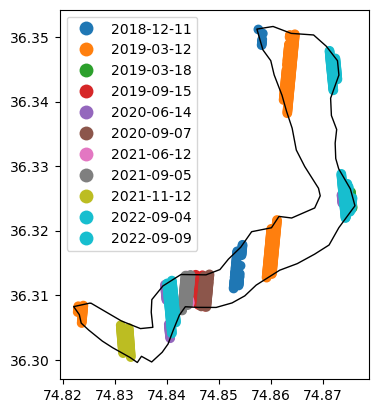

In [83]:
ax = gdf_sel.plot(column='date', legend="True")
lake_wgs84.plot(ax=ax, facecolor='none')


<AxesSubplot: >

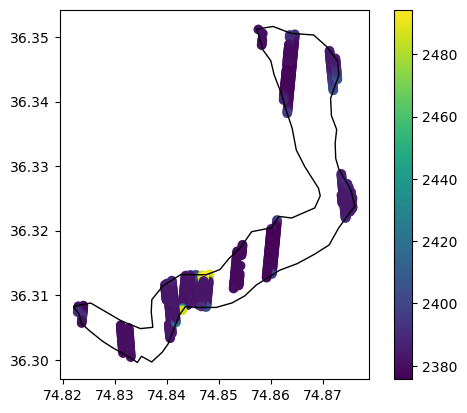

In [84]:
ax = gdf_sel.plot(column='h_mean', legend="True")
lake_wgs84.plot(ax=ax, facecolor='none')

In [87]:
gdf_sel = gdf_sel[['h_mean', 'date']]

In [46]:
gdf_sel

,h_mean,date
time,,
2018-12-11 19:53:29.877312512,3505.126540,2018-12-11
2018-12-11 19:53:29.880121344,3481.673969,2018-12-11
2018-12-11 19:53:29.882349056,4162.015412,2018-12-11
2018-12-11 19:53:29.882934272,3478.532014,2018-12-11
2018-12-11 19:53:29.885172736,4181.627817,2018-12-11
...,...,...
2022-09-09 14:23:25.514832128,3791.708401,2022-09-09
2022-09-09 14:23:25.517641728,3768.761100,2022-09-09
2022-09-09 14:23:25.520445696,3747.324506,2022-09-09


In [88]:
gdf_mean = gdf_sel.groupby('date').median()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2018-12-11'),
  Text(1, 0, '2019-03-12'),
  Text(2, 0, '2019-03-18'),
  Text(3, 0, '2019-09-15'),
  Text(4, 0, '2020-06-14'),
  Text(5, 0, '2020-09-07'),
  Text(6, 0, '2021-06-12'),
  Text(7, 0, '2021-09-05'),
  Text(8, 0, '2021-11-12'),
  Text(9, 0, '2022-09-04'),
  Text(10, 0, '2022-09-09')])

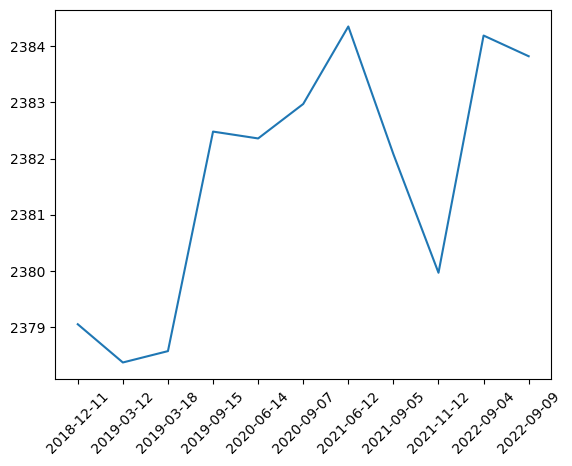

In [91]:
plt.plot(gdf_mean.index, gdf_mean['h_mean'], '-')
plt.xticks(rotation=45)